In [1]:
# Adding different cell groups to nb1_to_nb1 neurongroup.  
# Cell group added p2/3 (19.09.2021)
# Author:   Gressa
# Date:     19.09.2021

from brian2 import * 
from brian2tools import * 

In [18]:
# Main Equation to use in models

main_eqs = Equations('''

    dv/dt = 1/C*(k*(v - vr)*(v - vt) - u + I ) / tau : 1
    du/dt = 1/tau*a*(b * (v - vr) - u)  : 1
    I : 1
''')


WARNING    "u" is an internal variable of group "neurongroup_4", but also exists in the run namespace with the value 670. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "u" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 670. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


<AxesSubplot:xlabel='time (ms)', ylabel='v'>

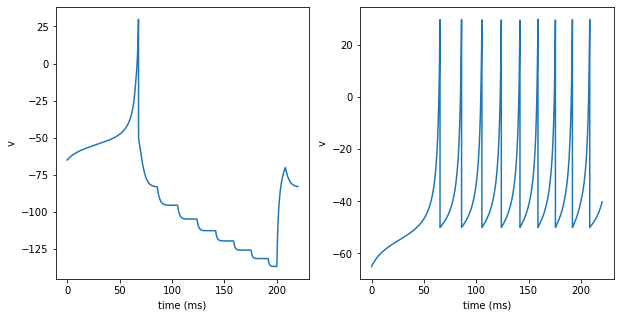

In [28]:
start_scope()

nb1 = {
    'k':0.3, 
    'C':20,
    'vr':-66, 'vt':-40,
    'a':0.17,'b':5,'c':-45, 'd':100,
    'u': 670, 'tau':2*ms
        }

### nb1 - LS (Late Spiking Neuron Model)

defaultclock.dt = 0.01*ms
start_scope()
# Paramaters
k = 0.3
C = 20

vr = -66
vt = -40

a = 0.17
b = 5
c = -45
d = 100

u = 670
tau = 2*ms          

### NEURON GROUP

numN = 1024         #Number of neurons
p_nb1 = 10.1/100    #Probablity of connection

N1 = NeuronGroup(numN, main_eqs, threshold='v>30',
                 reset='v = c; u = u + vr ',  method='euler')
#=======================================================================================================
# RC Paramaters
# Probability 
p_p23_nb1 = 6.3/100

rc = {
    'k':3, 
    'C':100,
    'vr':-60, 'vt':-50,
    'a':0.03,'b':8,'c':-50, 'd':20,
    'u': 670, 'tau':5*ms}



k = rc['k']
C = rc['C']
vr = rc['vr']
vt = rc['vt']
a = rc["a"]
b = rc["b"]
c = rc["c"]
d = rc["d"]
u = rc["u"]
tau = rc["tau"]

### NEURON GROUP

numN = 1024         #Number of neurons
p_nb1 = 10.1/100    #Probablity of connection


N2 = NeuronGroup(numN, main_eqs, threshold='v>30',
                 reset='v = c; u = u + vr ',  method='euler')

#=======================================================================================================

# Synapses
N1.v = '-65  + randn()'
N1.I = '200 - 10*randn()'

S1 = Synapses(N1, N1)
S2 = Synapses(N2, N1, 'w:1',on_pre='I-=w')

S1.connect(p = p_nb1, condition='i!=j')
S2.connect(p = p_p23_nb1,condition='i!=j')
S2.w = 40
# Begining value for weight = 50
# Values tried = 50,

M1 = StateMonitor(N1,'v', record = 0)
spM1 = SpikeMonitor(N1)

M2 = StateMonitor(N2, 'v', record = 0)
spM2 = SpikeMonitor(N2)


# Simulation
N1.v = '-65  + randn()'
N1.I = '200 - 10*randn()'

N2.v = -65
N2.I = 200

run(200*ms)

N1.I = 0
N2.I = 0

run(20*ms)

figure(figsize=(10, 5))

subplot(121)
brian_plot(M1)
subplot(122)
brian_plot(M2)


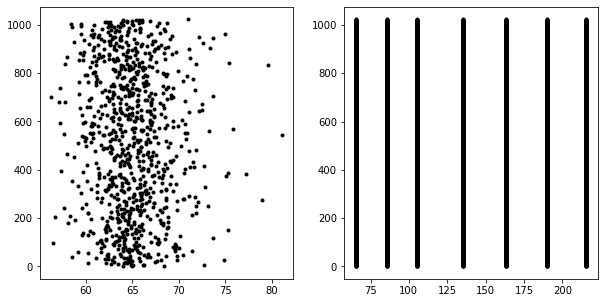

In [47]:
def plot_spiking_mons():
    figure(figsize=(10, 5))

    subplot(121)
    plot(spM1.t/ms, spM1.i, '.k')
    subplot(122)
    plot(spM2.t/ms, spM2.i, '.k')

plot_spiking_mons()

Text(0.5, 1.0, 'S2')

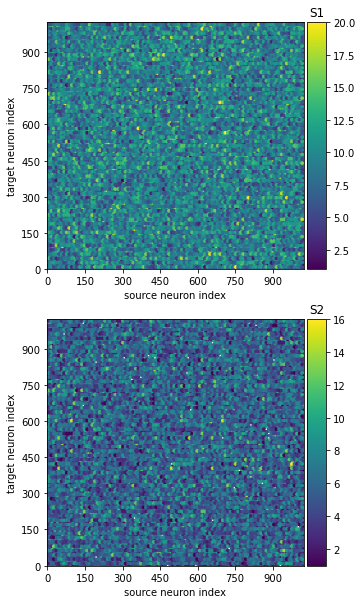

In [41]:
figure(figsize=(5, 10))
subplot(211)
brian_plot(S1)
title('S1')
subplot(212)
brian_plot(S2)
title('S2')

In [4]:
nb1['k']


0.3

In [22]:
# RC Paramaters
rc = {
    'k':3, 
    'C':100,
    'vr':-60, 'vt':-50,
    'a':0.03,'b':8,'c':-50, 'd':20,
    'u': 670, 'tau':5*ms}



k = rc['k']
C = rc['C']
vr = rc['vr']
vt = rc['vt']
a = rc["a"]
b = rc["b"]
c = rc["c"]
d = rc["d"]
u = rc["u"]
tau = rc["tau"]

### NEURON GROUP

numN = 1024         #Number of neurons
p_nb1 = 10.1/100    #Probablity of connection


N2 = NeuronGroup(numN, main_eqs, threshold='v>30',
                 reset='v = c; u = u + vr ',  method='euler')


